## Imports

In [ ]:
pip install wordcloud adjustText

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
import string

from wordcloud import WordCloud
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from adjustText import adjust_text

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import joblib
import plotly.figure_factory as ff
import numpy as np
import hashlib
import csv
import pickle

from sklearn.metrics.pairwise import cosine_similarity
from datasketch import MinHash, MinHashLSH

import re
from nltk.tokenize import word_tokenize
import os
from gensim.models import Word2Vec
import networkx as nx
from pyvis.network import Network
from scipy.spatial.distance import cosine
import plotly.express as px
import webbrowser

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saver\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Data Analysis

  lan_code                sentence
0      cmn                  我們試試看！
1      cmn                 我该去睡觉了。
2      cmn                 你在干什麼啊？
3      cmn                  這是什麼啊？
4      cmn  今天是６月１８号，也是Muiriel的生日！
    lan_code  frequency
0        eng    1586621
1        rus     909951
2        ita     805104
3        tur     717897
4        epo     685643
..       ...        ...
399      hax          1
400      rel          1
401      lou          1
402      nys          1
403      cyo          1

[404 rows x 2 columns]


C:\Users\saver\AppData\Local\Temp\ipykernel_37764\4109893017.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')


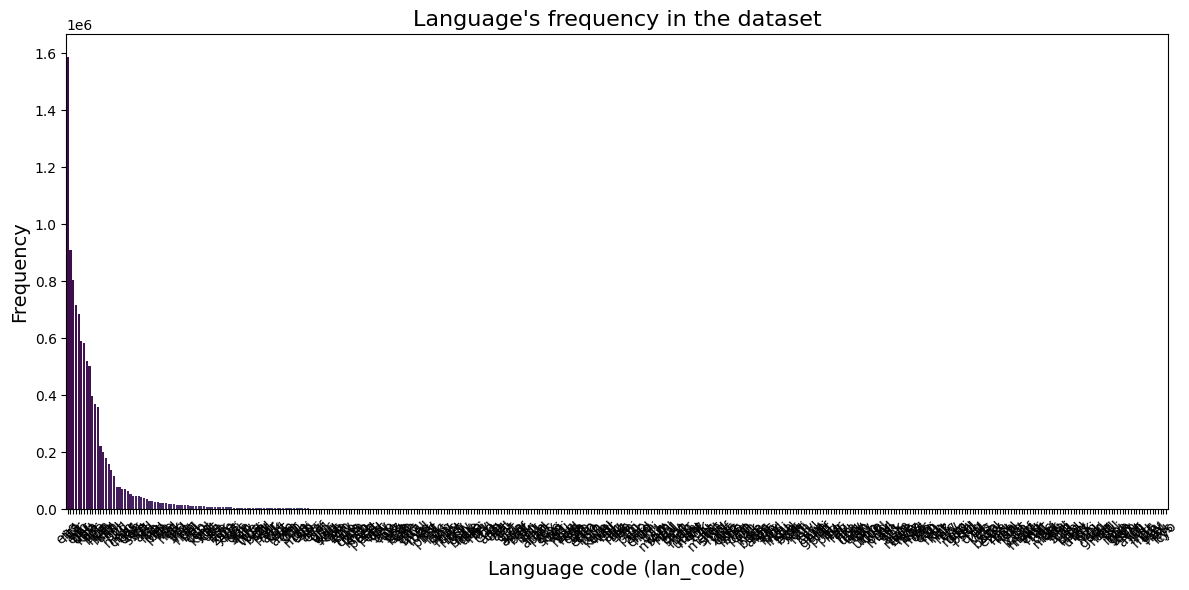

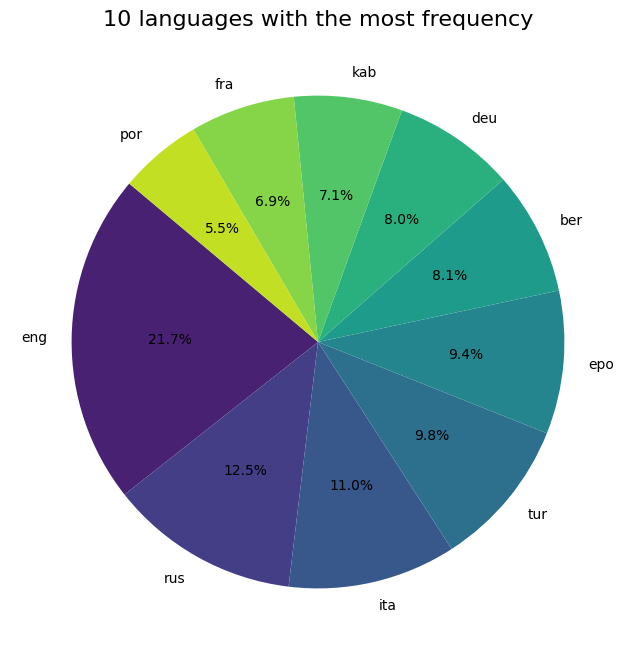

In [3]:
# Load dataset
file_path = 'data/sentences.csv'  
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

print(data.head())

# Compute languages frquencies
language_counts = data['lan_code'].value_counts()

# visualize frequencies
language_df = language_counts.reset_index()
language_df.columns = ['lan_code', 'frequency']
print(language_df)

# plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Language\'s frequency in the dataset', fontsize=16)
plt.xlabel('Language code (lan_code)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

# plot pie chart
top_languages = language_df.head(10)  
plt.figure(figsize=(8, 8))
plt.pie(top_languages['frequency'], labels=top_languages['lan_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_languages)))
plt.title('10 languages with the most frequency', fontsize=16)
plt.show()

New dataset saved in file: data/filtered_language_detection.csv
Dimension of the new dataset: 10041510 rows (on 10341812).
   lan_code  frequency
0       eng    1586621
1       rus     909951
2       ita     805104
3       tur     717897
4       epo     685643
5       ber     591222
6       deu     584674
7       kab     518328
8       fra     501241
9       por     398029
10      spa     369841
11      hun     357828
12      jpn     220103
13      heb     199203
14      ukr     178269
15      nld     159193
16      fin     139089
17      pol     116582
18      mkd      77949
19      lit      76149
20      cmn      72439
21      mar      69303
22      ces      63880
23      dan      54945
24      tok      47203
25      swe      47006
26      srp      45199
27      lat      41498
28      ara      38650
29      ell      34805
30      ron      28172
31      ina      27493
32      pes      25662
33      bul      24609
34      tlh      22288
35      lfn      21414
36      vie      20897
37 

C:\Users\saver\AppData\Local\Temp\ipykernel_37764\3160606773.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')


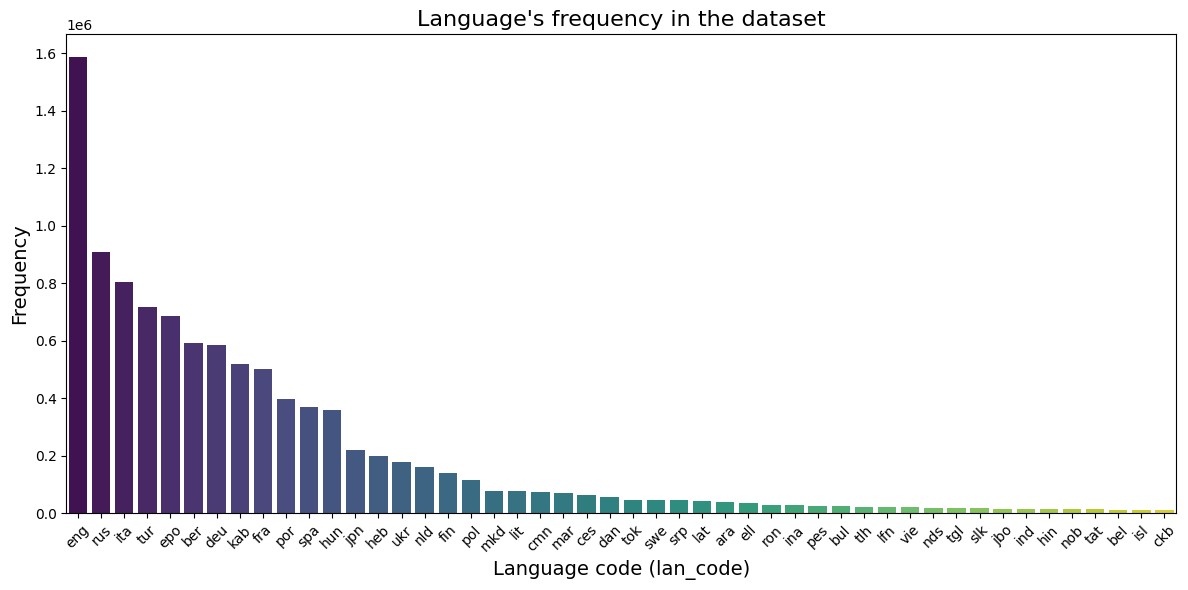

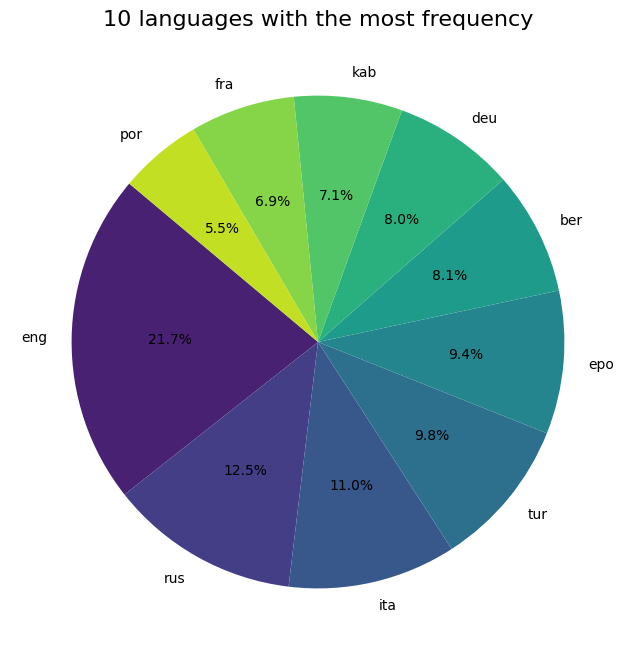

In [4]:
total_rows = len(data)

# Filter on the number of sentences, below 0.1% discard
threshold = 0.001 * total_rows  
valid_languages = language_counts[language_counts >= threshold].index
filtered_data = data[data['lan_code'].isin(valid_languages)]

# Save new dataset
output_path = 'data/filtered_language_detection.csv' 
filtered_data.to_csv(output_path, index=False)

print(f"New dataset saved in file: {output_path}") 
print(f"Dimension of the new dataset: {len(filtered_data)} rows (on {total_rows}).")

file_path = 'data/filtered_language_detection.csv'  
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# New frequencies of the languages 
language_counts = data['lan_code'].value_counts()
language_df = language_counts.reset_index()
language_df.columns = ['lan_code', 'frequency']
print(language_df)

# Visualize language's frequencies
plt.figure(figsize=(12, 6))
sns.barplot(data=language_df, x='lan_code', y='frequency', palette='viridis')
plt.xticks(rotation=45)
plt.title('Language\'s frequency in the dataset', fontsize=16)
plt.xlabel('Language code (lan_code)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

# pie chart
top_languages = language_df.head(10)  
plt.figure(figsize=(8, 8))
plt.pie(top_languages['frequency'], labels=top_languages['lan_code'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_languages)))
plt.title('10 languages with the most frequency', fontsize=16)
plt.show()

In [5]:
def get_unique_terms(sentence):
    if isinstance(sentence, str):
        words = sentence.lower().split()
        return set(words)
    return set()

# dictionary for the unique terms
unique_terms_per_language = {}

# iterate on all languages
for lan_code, group in data.groupby('lan_code'):
    all_terms = set()
    for sentence in group['sentence']:
        all_terms.update(get_unique_terms(sentence))
    unique_terms_per_language[lan_code] = len(all_terms)

# visualize the results
unique_terms_df = pd.DataFrame(list(unique_terms_per_language.items()), columns=['lan_code', 'unique_terms'])
unique_terms_df = unique_terms_df.sort_values(by='unique_terms', ascending=False)  # sort
print(unique_terms_df)

# Save
output_path = 'data/unique_terms_per_language.csv'
unique_terms_df.to_csv(output_path, index=False)

print(f"Saved in: {output_path}")

   lan_code  unique_terms
36      rus        255924
11      epo        247182
22      jpn        220719
16      hun        214852
45      tur        211054
23      kab        203891
2       ber        201578
8       deu        197008
10      eng        170993
38      spa        128056
13      fra        125321
34      por        121962
20      ita        121699
12      fin        101601
14      heb         99955
6       cmn         76048
33      pol         75483
46      ukr         71530
30      nld         56689
26      lit         52097
39      srp         46588
24      lat         44511
4       ces         44506
0       ara         44422
28      mkd         41441
7       dan         31889
41      tat         29627
27      mar         27588
40      swe         26363
17      ina         25991
35      ron         23956
1       bel         23463
9       ell         23407
3       bul         21865
32      pes         21423
43      tlh         21217
25      lfn         20317
42      tgl 

  lan_code  unique_terms
0      rus        255924
1      epo        247182
2      jpn        220719
3      hun        214852
4      tur        211054


C:\Users\saver\AppData\Local\Temp\ipykernel_37764\481683172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=unique_terms_df, x='lan_code', y='unique_terms', palette='viridis')


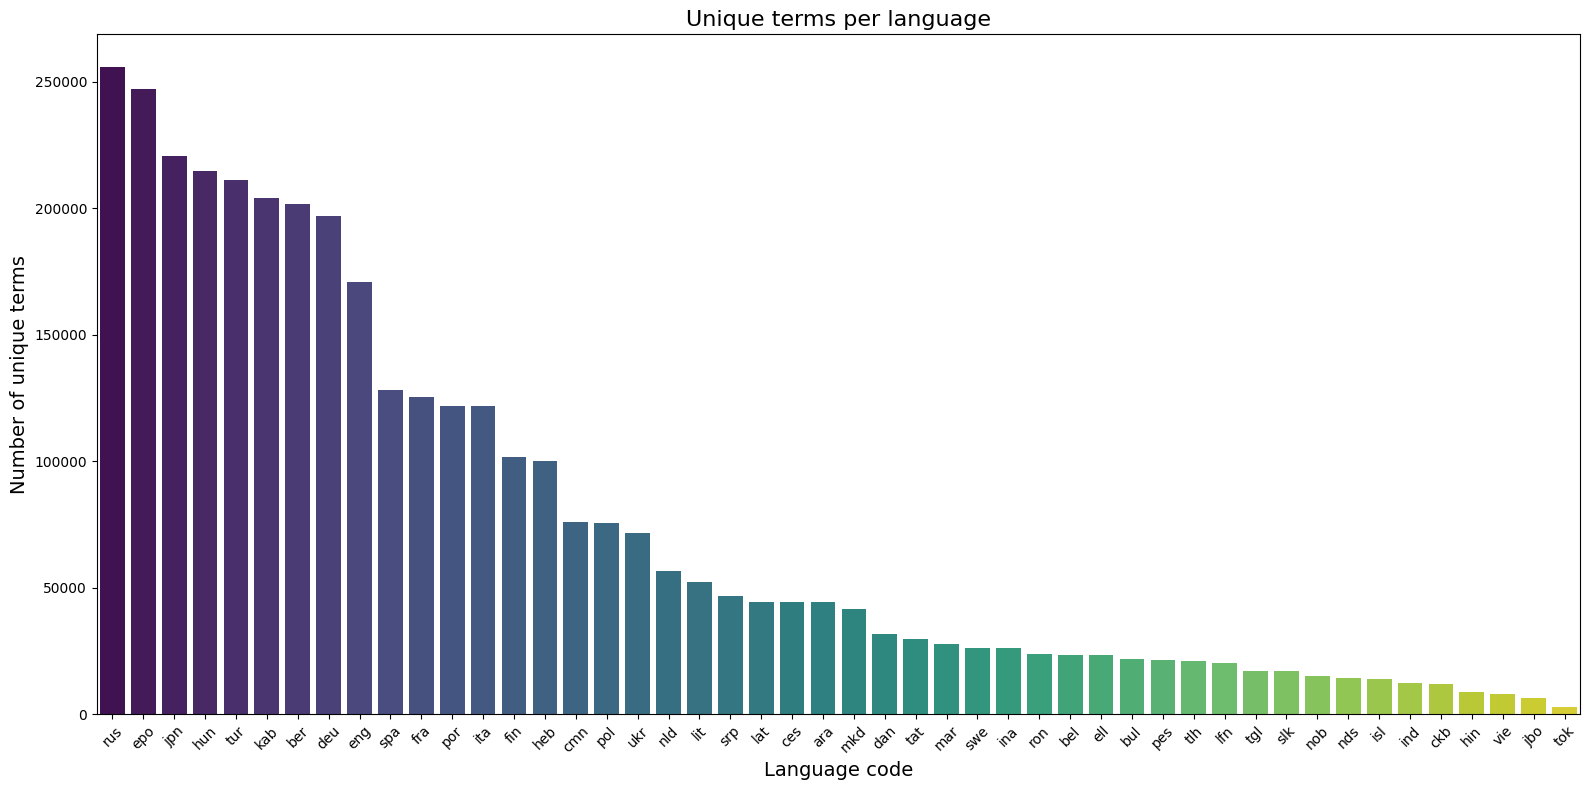

In [6]:
input_path = 'data/unique_terms_per_language.csv'
unique_terms_df = pd.read_csv(input_path)

print(unique_terms_df.head())

# Bar chart 
plt.figure(figsize=(16, 8))
sns.barplot(data=unique_terms_df, x='lan_code', y='unique_terms', palette='viridis')
plt.xticks(rotation=45, fontsize=10)
plt.title('Unique terms per language', fontsize=16)
plt.xlabel('Language code', fontsize=14)
plt.ylabel('Number of unique terms', fontsize=14)
plt.tight_layout()
plt.show()

## TF-IDF

In [7]:
# load dataset
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Concatenate all sentences for each language
language_sentences = data.groupby('lan_code')['sentence'].apply(lambda x: ' '.join(x)).reset_index()

# Calculate tf-idf
tfidf_vectorizer = TfidfVectorizer(max_features=10000 , lowercase=True)  
tfidf_matrix = tfidf_vectorizer.fit_transform(language_sentences['sentence'])

# visualize results
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=language_sentences['lan_code'], columns=tfidf_vectorizer.get_feature_names_out())
print(tfidf_df.head())

# save in a new file
output_path = 'data/tfidf_language_analysis.csv'
tfidf_df.to_csv(output_path)

print(f"TF-IDF saved in: {output_path}")

                00       000        10       100        11        12  \
lan_code                                                               
ara       0.000000  0.000325  0.000171  0.000190  0.000061  0.000081   
bel       0.000544  0.000360  0.000650  0.000480  0.000272  0.000360   
ber       0.000596  0.000085  0.000279  0.000149  0.000047  0.000096   
bul       0.000347  0.000420  0.000276  0.000306  0.000043  0.000038   
ces       0.000032  0.000142  0.000230  0.000255  0.000000  0.000028   

                13        14        15        16  ...     ṛebbi     ṛuḥen  \
lan_code                                          ...                       
ara       0.000057  0.000115  0.000057  0.000029  ...  0.000000  0.000000   
bel       0.000250  0.000128  0.000250  0.000130  ...  0.000000  0.000000   
ber       0.000076  0.000038  0.000071  0.000032  ...  0.005564  0.007426   
bul       0.000040  0.000122  0.000120  0.000000  ...  0.000000  0.000000   
ces       0.000059  0.000030  0.0

In [8]:
# load
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

def remove_stopwords(sentence, language):
    try:
        stop_words = set(stopwords.words(language))  # try to remove the stopwards if available in the module used
    except:
        stop_words = set()  # otherwise do nothing
    # Tokenize and remove punctuation and stopwords
    tokens = sentence.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return ' '.join([word for word in tokens if word not in stop_words])

# map the language code to the language name
language_mapping = {
    'eng': 'english',
    'ita': 'italian',
    'fra': 'french',
    'spa': 'spanish',
    'deu': 'german',
    'ara': 'arabic',
    'aze': 'azerbaijani',
    'tur': 'turkish',
    'dan': 'danish',
    'fin': 'finnish',
    'ell': 'greek',
    'hun': 'hungarian',
    'ind': 'indonesian',
    'kaz': 'kazakh',
    'npi': 'nepali',
    'nob': 'norwegian',
    'rom': 'romanian',
    'por': 'portuguese',
    'rus': 'russian',
    'slv': 'slovene',
    'swe': 'swedish',
    'tgk': 'tajik'
}

# stopword removal for each sentence
data['cleaned_sentence'] = data.apply(
    lambda row: remove_stopwords(row['sentence'], language_mapping.get(row['lan_code'], '')),
    axis=1
)

# concatenate the sentences
language_sentences = data.groupby('lan_code')['cleaned_sentence'].apply(lambda x: ' '.join(x)).reset_index()

# Calculate tf-idf
tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True)  
tfidf_matrix = tfidf_vectorizer.fit_transform(language_sentences['cleaned_sentence'])

# visualize the results
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=language_sentences['lan_code'], columns=tfidf_vectorizer.get_feature_names_out())

# Save in a new file
output_path = 'data/tfidf_language_analysis_with_stopwords_removal.csv'
tfidf_df.to_csv(output_path)
print(f"TF-IDF with stopwords removal saved in: {output_path}")

TF-IDF with stopwords removal saved in: data/tfidf_language_analysis_with_stopwords_removal.csv


In [9]:
file_path = 'data/tfidf_language_analysis.csv'
tfidf_df = pd.read_csv(file_path, index_col=0)

file_path = 'data/tfidf_language_analysis_with_stopwords_removal.csv'
filtered_tfidf_df = pd.read_csv(file_path, index_col=0)


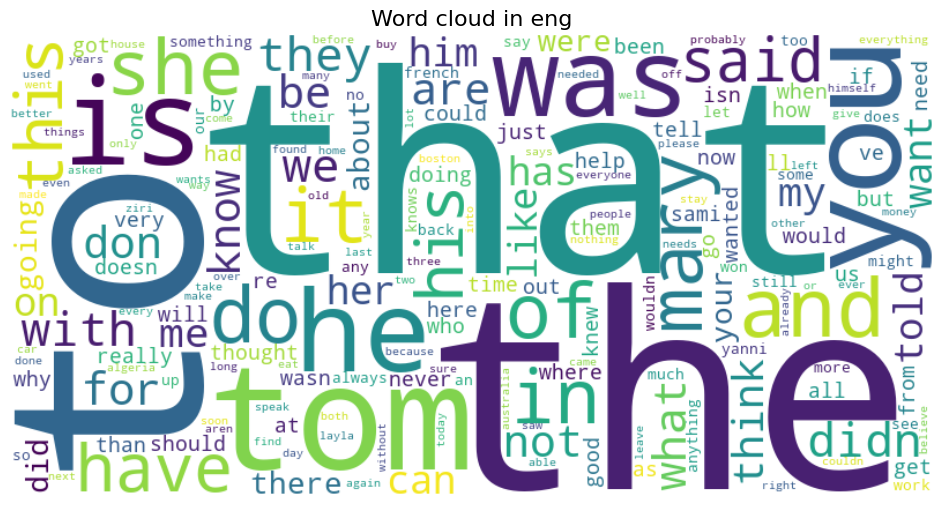

In [10]:
# English wordcloud   
language_to_plot = 'eng'  

if language_to_plot in tfidf_df.index:
    word_scores = tfidf_df.loc[language_to_plot].dropna().to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(word_scores)

    # Mostrare la nuvola di parole
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word cloud in {language_to_plot}", fontsize=16)
    plt.show()
else:
    print(f"The language '{language_to_plot}' is not in the Dataframe.")


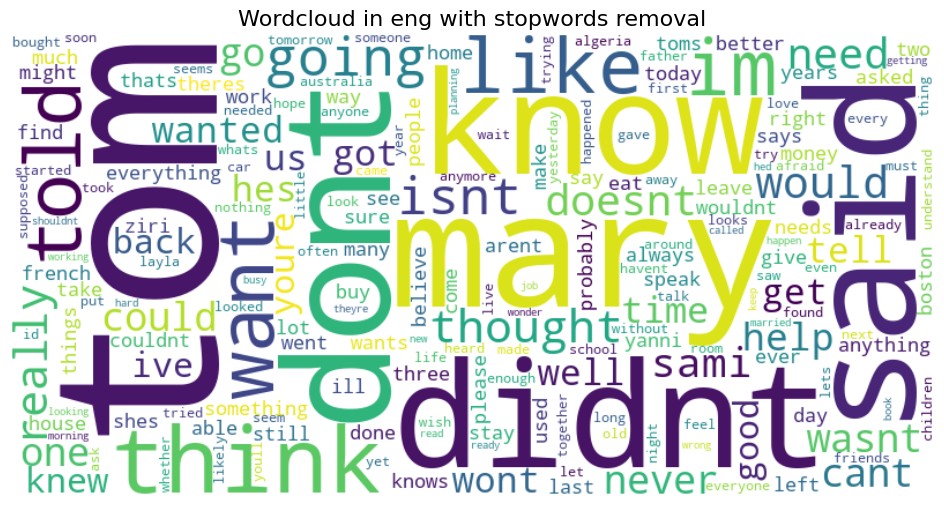

In [11]:
# wordcloud without stopwords
if language_to_plot in filtered_tfidf_df.index:
    word_scores = filtered_tfidf_df.loc[language_to_plot].dropna().to_dict()

    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    wordcloud.generate_from_frequencies(word_scores)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud in {language_to_plot} with stopwords removal", fontsize=16)
    plt.show()
else:
    print(f"The language '{language_to_plot}' is not present in the DataFrame.")

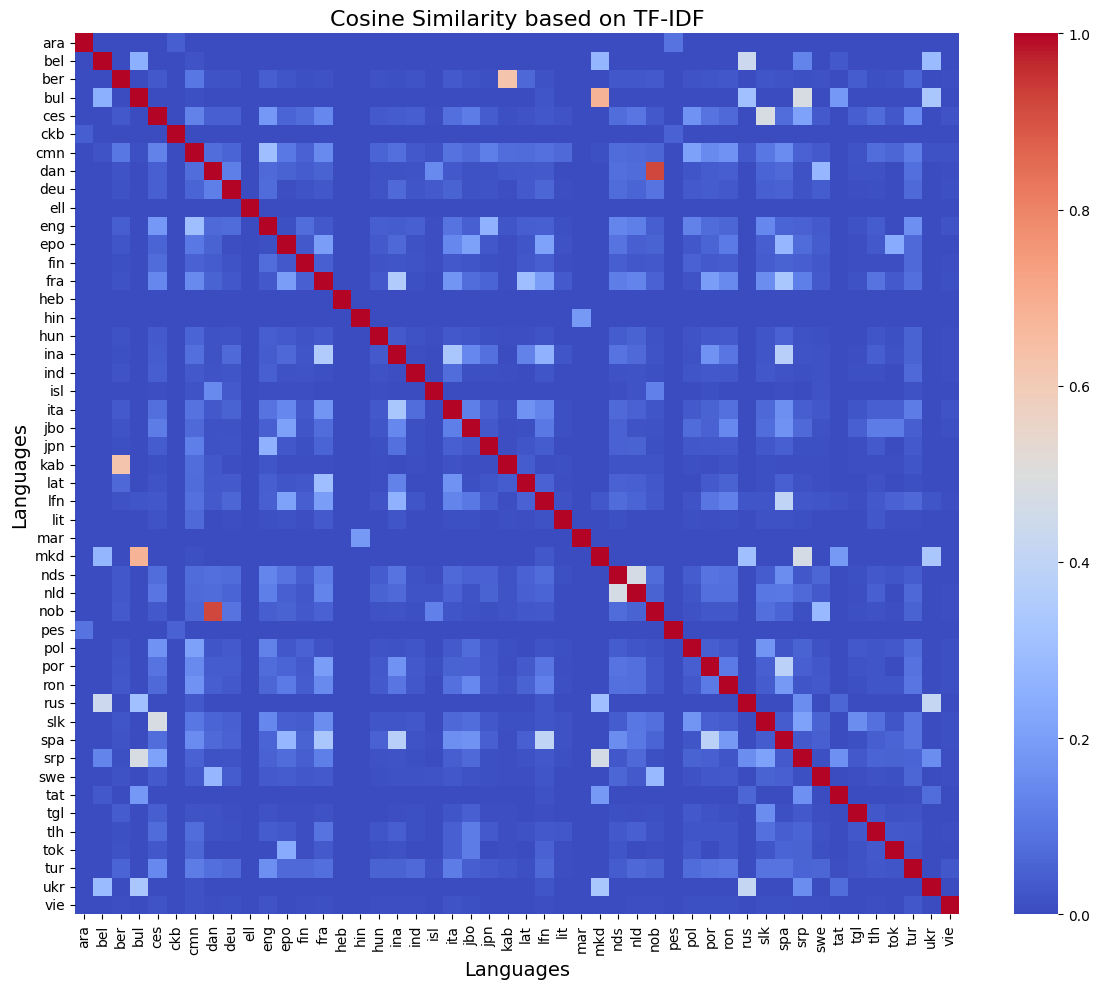

In [12]:
#cosine similarity 
similarity_matrix = cosine_similarity(tfidf_df)

#visualize the similarity's heatmap 
similarity_df = pd.DataFrame(similarity_matrix, index=tfidf_df.index, columns=tfidf_df.index)
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Cosine Similarity based on TF-IDF", fontsize=16)
plt.xlabel("Languages", fontsize=14)
plt.ylabel("Languages", fontsize=14)
plt.tight_layout()
plt.show()


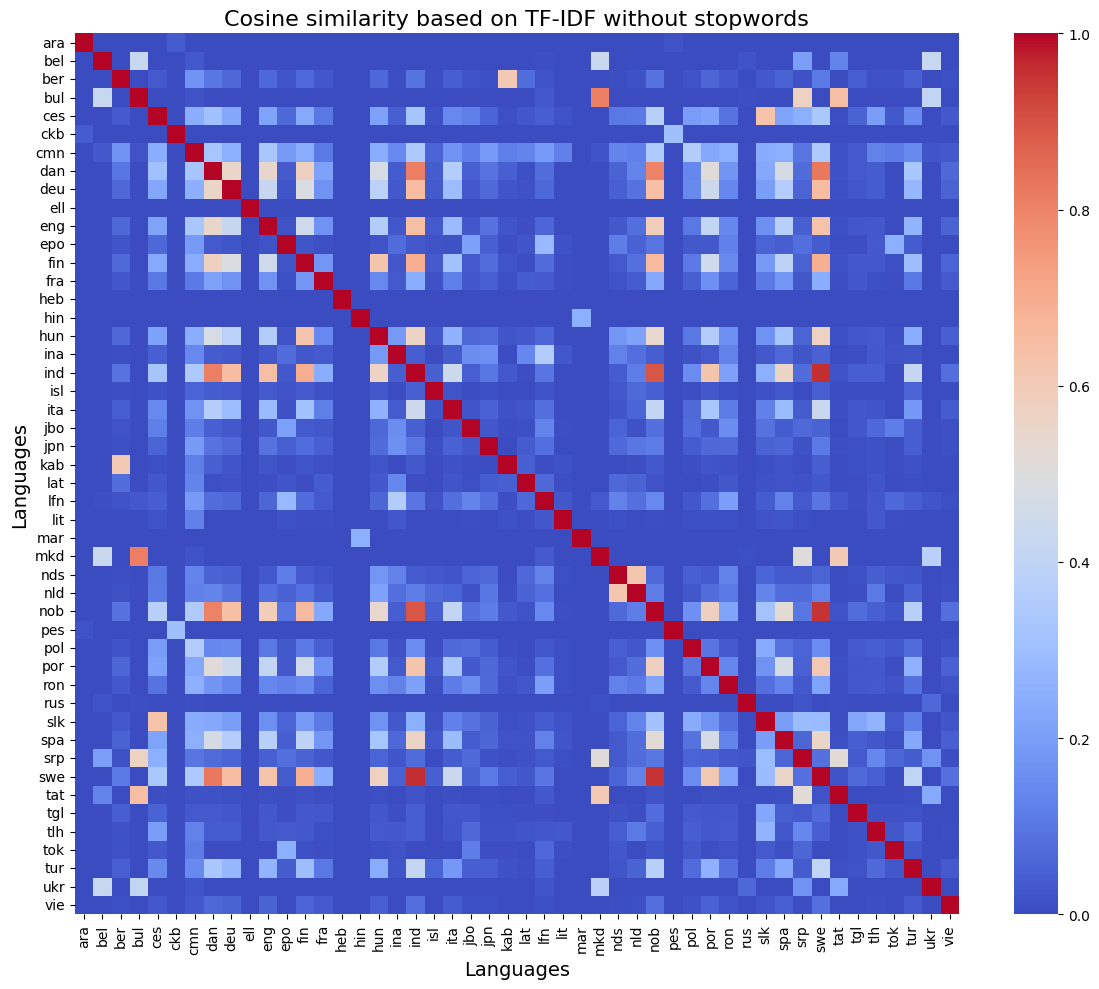

In [13]:
# Cosine similarity with stopwords removal
similarity_matrix = cosine_similarity(filtered_tfidf_df)

# Visualize the similarity's heatmap
similarity_df = pd.DataFrame(similarity_matrix, index=filtered_tfidf_df.index, columns=filtered_tfidf_df.index) 
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, cmap="coolwarm", annot=False)
plt.title("Cosine similarity based on TF-IDF without stopwords", fontsize=16)
plt.xlabel("Languages", fontsize=14)
plt.ylabel("Languages", fontsize=14)
plt.tight_layout()
plt.show()

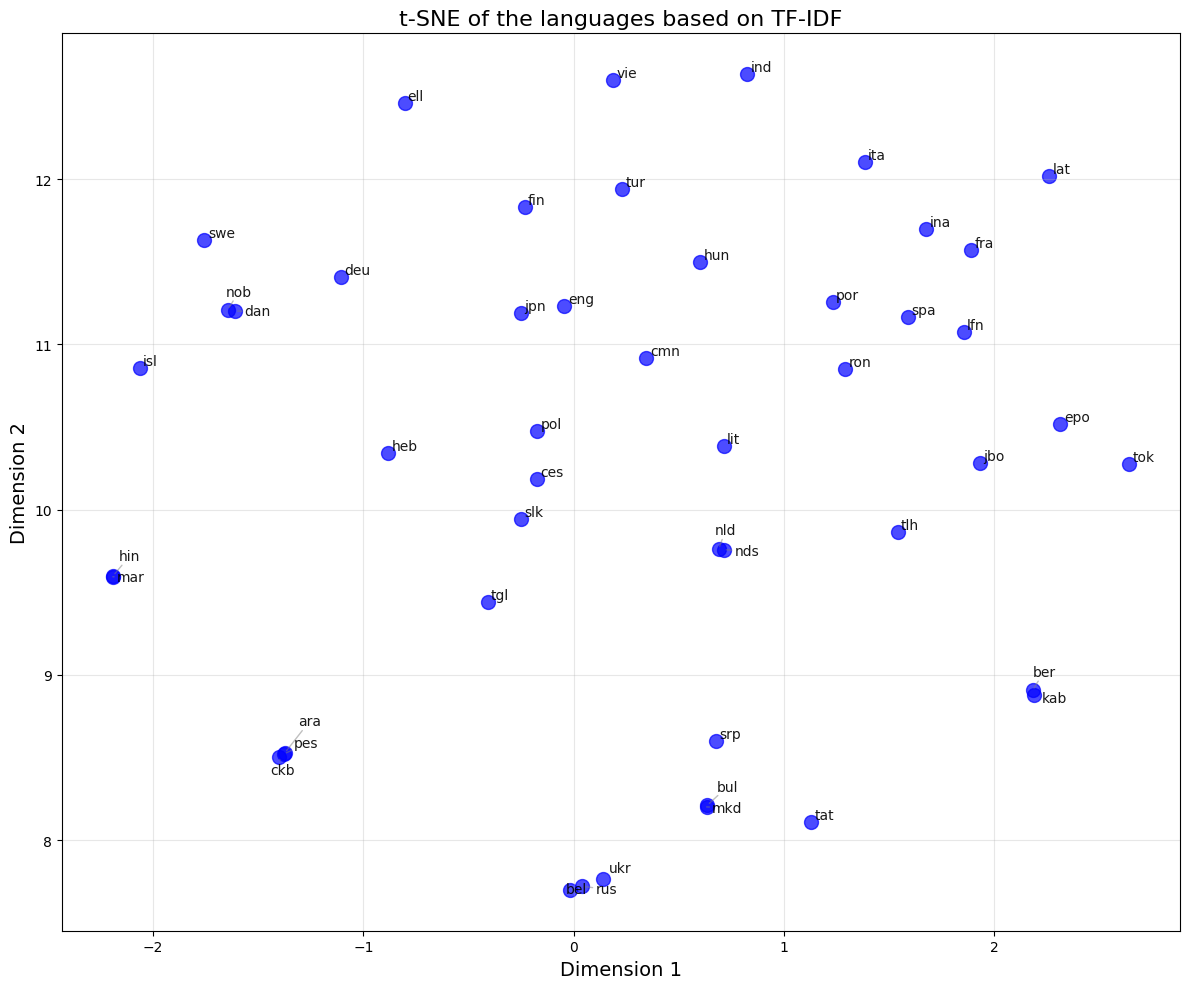

In [14]:
# Apply T-SNE on Tf-IDf
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_df)

# visualize plot
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['lan_code'] = tfidf_df.index
plt.figure(figsize=(12, 10))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], s=100, c='blue', alpha=0.7)

# Add label for each language
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

# used to avoid overlapping
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

plt.title("t-SNE of the languages based on TF-IDF", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


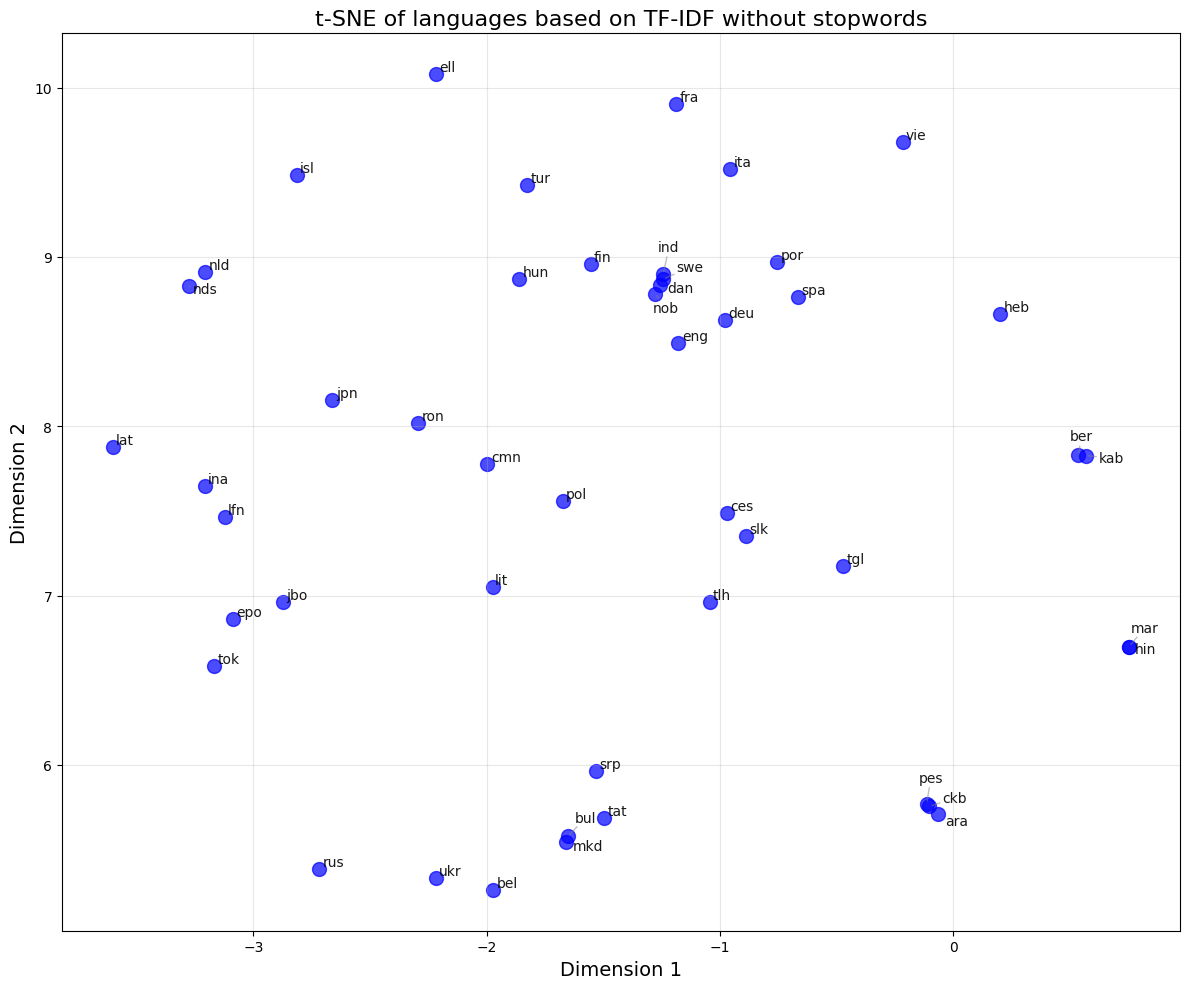

In [15]:
# Apply T-SNE on TF-IDf without stopwords
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(filtered_tfidf_df)

# visualize plot
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['lan_code'] = filtered_tfidf_df.index
plt.figure(figsize=(12, 10))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], s=100, c='blue', alpha=0.7)

# add a label for each language 
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

plt.title("t-SNE of languages based on TF-IDF without stopwords", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Best Silhouette Score with k=37: 0.0826


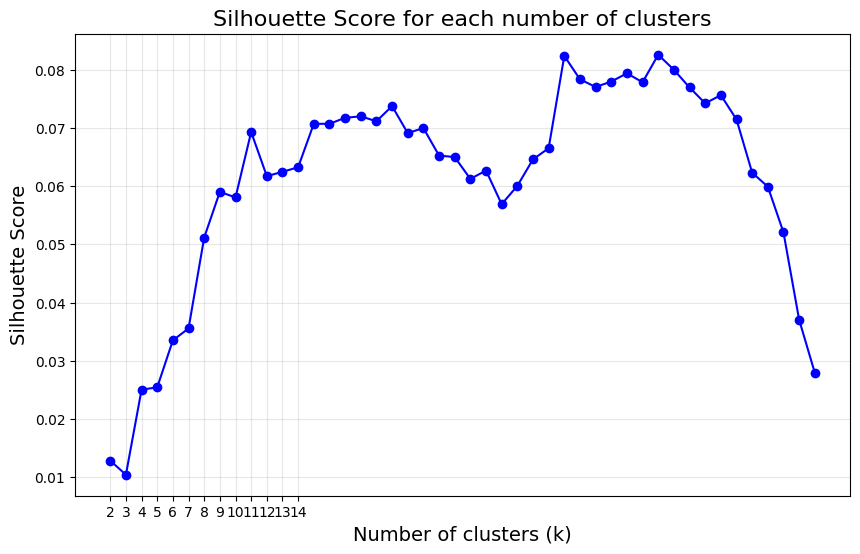

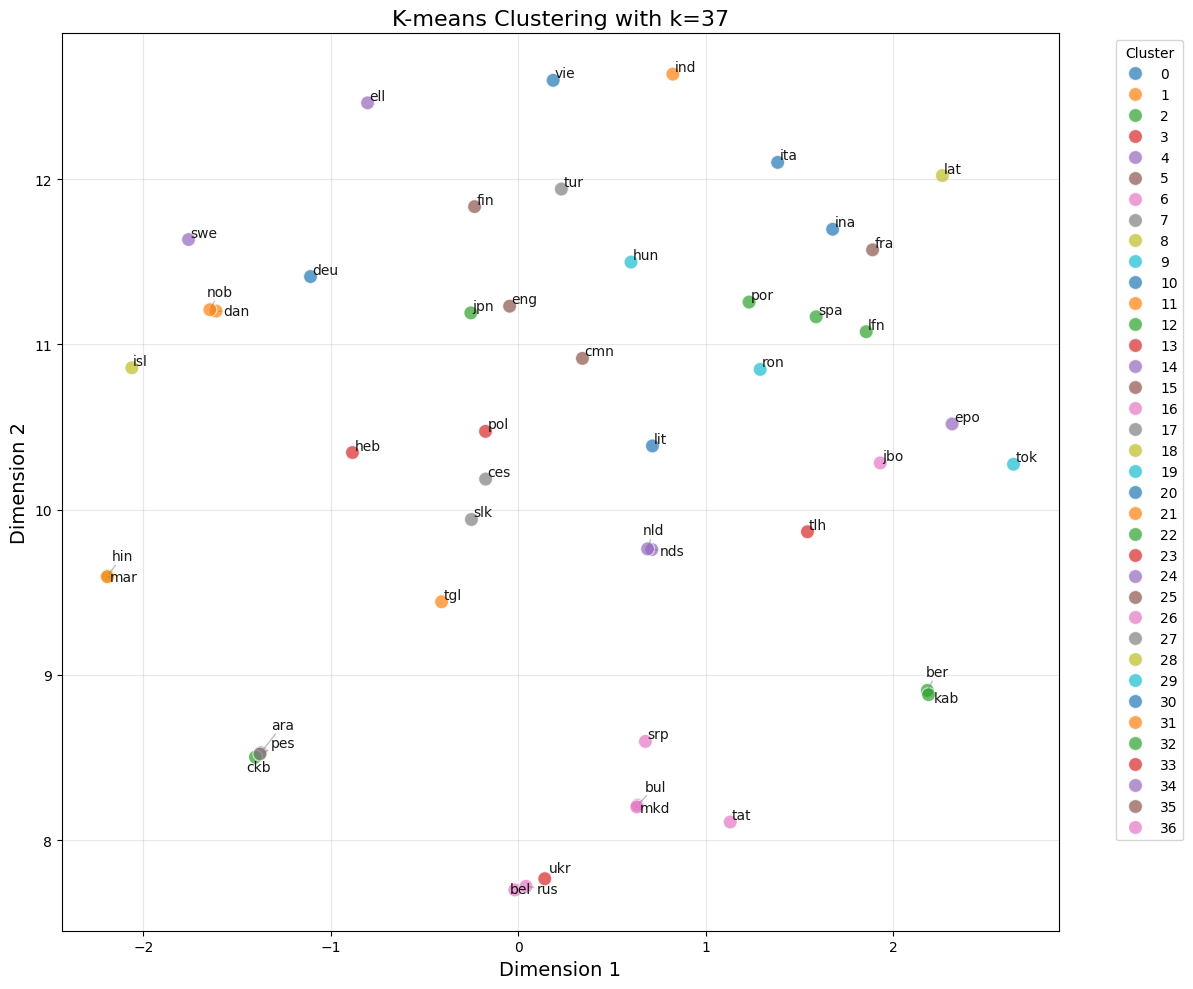

In [16]:
# Finding the most suitable clustering
best_k = 0 # number of clusters
best_sil_score = 0 # silhouette score
silhouette_scores = [] 

# cycle to find the best number of clusters
for k in range(2, 48):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(tfidf_df)
    sil_score = silhouette_score(tfidf_df, clusters)
    silhouette_scores.append((k, sil_score))
    
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k = k

print(f"Best Silhouette Score with k={best_k}: {best_sil_score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores], marker='o', linestyle='-', color='b')
plt.xticks(range(2, 15))
plt.title("Silhouette Score for each number of clusters", fontsize=16)
plt.xlabel("Number of clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

# Clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(tfidf_df)

# visualize
tfidf_df['Cluster'] = clusters

# Apply t-SNE 
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_df.drop('Cluster', axis=1))  # remove cluster column

tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters
tsne_df['lan_code'] = tfidf_df.index

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=tsne_df,
    x='Dimension 1', y='Dimension 2',
    hue='Cluster', palette='tab10', s=100, alpha=0.7
)

# Add a label for each language
texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

plt.title(f"K-means Clustering with k={best_k}", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Best Silhouette Score with k=21: 0.1288


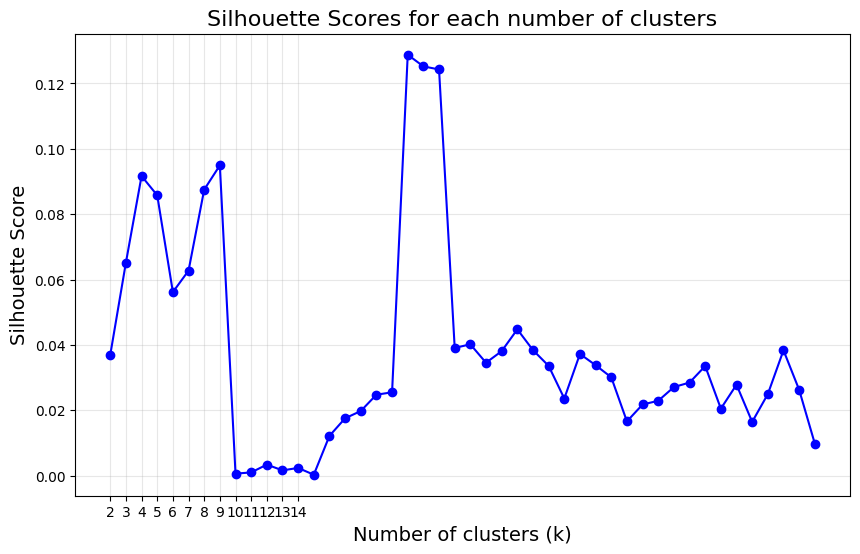

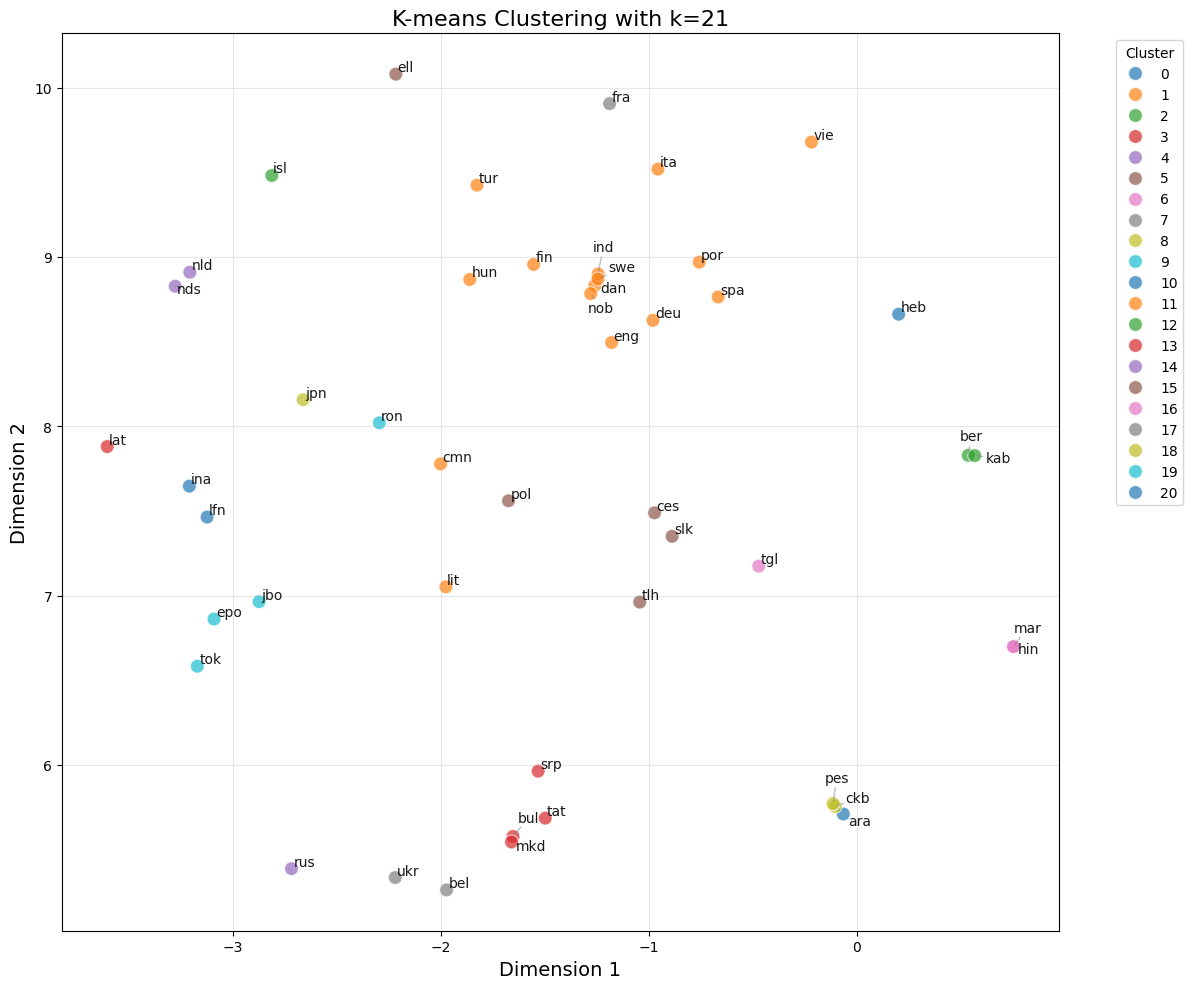

In [17]:
# Finding the most suitable clustering without stopwords
best_k = 0
best_sil_score = 0
silhouette_scores = []

for k in range(2, 48):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(filtered_tfidf_df)

    sil_score = silhouette_score(filtered_tfidf_df, clusters)
    silhouette_scores.append((k, sil_score))
    
    if sil_score > best_sil_score:
        best_sil_score = sil_score
        best_k = k

print(f"Best Silhouette Score with k={best_k}: {best_sil_score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in silhouette_scores], [x[1] for x in silhouette_scores], marker='o', linestyle='-', color='b')
plt.xticks(range(2, 15))
plt.title("Silhouette Scores for each number of clusters", fontsize=16)
plt.xlabel("Number of clusters (k)", fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

kmeans = KMeans(n_clusters=best_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(filtered_tfidf_df)

filtered_tfidf_df['Cluster'] = clusters

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(filtered_tfidf_df.drop('Cluster', axis=1))  

tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = clusters
tsne_df['lan_code'] = filtered_tfidf_df.index

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=tsne_df,
    x='Dimension 1', y='Dimension 2',
    hue='Cluster', palette='tab10', s=100, alpha=0.7
)

texts = []
for i, row in tsne_df.iterrows():
    texts.append(plt.text(row['Dimension 1'], row['Dimension 2'], row['lan_code'], fontsize=10, alpha=0.9))

adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5))

plt.title(f"K-means Clustering with k={best_k}", fontsize=16)
plt.xlabel("Dimension 1", fontsize=14)
plt.ylabel("Dimension 2", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Document Clustering

## Preprocessing phase

In [18]:
file_path = "data/filtered_language_detection.csv"
data = pd.read_csv(file_path)

total_rows = len(data)
language_counts = data['lan_code'].value_counts()

# filter languages with less than 1% of the total number of sentences
threshold = 0.01 * total_rows  
valid_languages = language_counts[language_counts >= threshold].index
filtered_data = data[data['lan_code'].isin(valid_languages)]

# save
output_path = 'data/doublefiltered_language_detection.csv'  
filtered_data.to_csv(output_path, index=False)

print(f"New file saved in: {output_path}")
print(f"Dimension of the new dataset: {len(filtered_data)} rows (on {total_rows}).")
print(f"Number of valid languages: {len(valid_languages)}")

New file saved in: data/doublefiltered_language_detection.csv
Dimension of the new dataset: 9038818 rows (on 10041510).
Number of valid languages: 18


In [19]:
# load
file_path = "data/doublefiltered_language_detection.csv"
df = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# Find the lowest number of sentences of a same language
min_documents = df.groupby('lan_code').size().min()
print(f"Lowest number of sentences in a language: {min_documents}")

# Filter uniformally randomly the same amount of sentences for each langauge
balanced_df = df.groupby('lan_code').apply(lambda x: x.sample(n=min_documents, random_state=42)).reset_index(drop=True)

#verify the balancement
balanced_counts = balanced_df.groupby('lan_code').size()
print("Sentences per language after the filtering:")
print(balanced_counts)

# Save
balanced_df.to_csv("data/balanced_language_dataset.csv", index=False)

Lowest number of sentences in a language: 116582


C:\Users\saver\AppData\Local\Temp\ipykernel_37764\3090601732.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('lan_code').apply(lambda x: x.sample(n=min_documents, random_state=42)).reset_index(drop=True)


Sentences per language after the filtering:
lan_code
ber    116582
deu    116582
eng    116582
epo    116582
fin    116582
fra    116582
heb    116582
hun    116582
ita    116582
jpn    116582
kab    116582
nld    116582
pol    116582
por    116582
rus    116582
spa    116582
tur    116582
ukr    116582
dtype: int64


In [20]:
# Load
file_path = 'data/balanced_language_dataset.csv'  
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# divide columns data
X = data['sentence']
y = data['lan_code']

tfidf_vectorizer = TfidfVectorizer(lowercase=True)
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

Vectorizer ready


## Clustering

In [21]:
# New Clustering 
num_clusters = 200
kmeans = KMeans(n_clusters=num_clusters, init="k-means++",random_state=42)
clusters = kmeans.fit_predict(X_tfidf)

# Analisys
data['cluster'] = clusters
grouped = data.groupby(['lan_code', 'cluster']).size().reset_index(name='count')

# compute total number of sentences for each cluster
cluster_totals = grouped.groupby('cluster')['count'].sum().reset_index()
cluster_totals.columns = ['cluster', 'total_count']

# compute the fraction of sentences on the total number
grouped = grouped.merge(cluster_totals, on='cluster')
grouped['fraction'] = grouped['count'] / grouped['total_count']

#Estimate the homogeneity 
homogeneity = grouped.groupby('cluster')['fraction'].max().mean()

# Resultats
print(f"Homogeneity's estimate: {homogeneity:.4f}")

grouped.to_csv("clustering_results.csv", index=False)

print("Saved in 'clustering_results.csv'.")

Homogeneity's estimate: 0.8456
Saved in 'clustering_results.csv'.


In [22]:
data['cluster'] = clusters

grouped = data.groupby(['lan_code', 'cluster']).size().reset_index(name='count')

# count the number of sentences for each cluster
cluster_totals = grouped.groupby('cluster')['count'].sum().reset_index()
cluster_totals.columns = ['cluster', 'total_count']

# compute the fraction on the total number
grouped = grouped.merge(cluster_totals, on='cluster')
grouped['fraction'] = grouped['count'] / grouped['total_count']

# find the dominant language of each cluster
dominant_languages = grouped.loc[grouped.groupby('cluster')['fraction'].idxmax()][['cluster', 'lan_code', 'fraction']]

# sort the clusters to visualize
dominant_languages = dominant_languages.sort_values(by='cluster')
print(dominant_languages)

# Save
dominant_languages.to_csv("balanced_dominant_languages_per_cluster.csv", index=False)
print("Results saved in 'balanced_dominant_languages_per_cluster.csv'.")

     cluster lan_code  fraction
285        0      heb  1.000000
102        1      eng  0.999784
618        2      rus  0.544979
103        3      eng  0.872981
144        4      epo  0.992557
..       ...      ...       ...
617      195      por  1.000000
782      196      ukr  0.995253
301      197      heb  1.000000
235      198      fin  0.833558
101      199      deu  0.999687

[200 rows x 3 columns]
Results saved in 'balanced_dominant_languages_per_cluster.csv'.


C:\Users\saver\AppData\Local\Temp\ipykernel_37764\438141781.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\saver\AppData\Local\Temp\ipykernel_37764\438141781.py:17: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


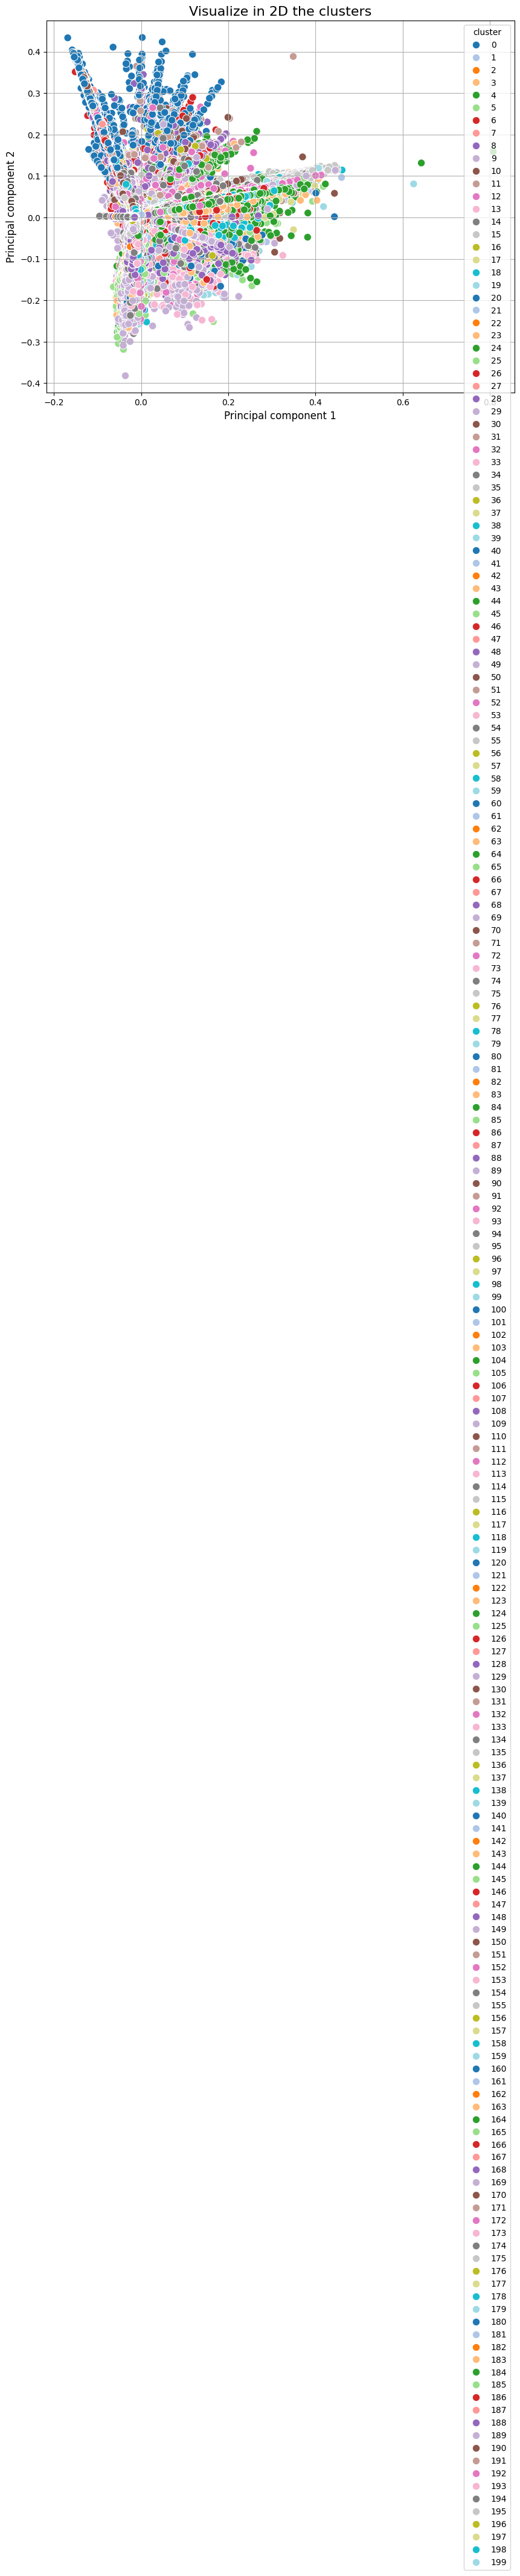

In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce the dimensionality using PCA
pca = PCA(n_components=2, random_state=42)

reduced_matrix_2d = pca.fit_transform(X_tfidf)

# visualize
plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_matrix_2d[:, 0], y=reduced_matrix_2d[:, 1], hue=data['cluster'], palette="tab20", s=80, marker='o')
plt.title('Visualize in 2D the clusters', fontsize=16)
plt.xlabel('Principal component 1', fontsize=12)
plt.ylabel('Principal component 2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#because of the high number of clusters the image is pretty much confused

In [24]:
# Dictionary to assign to each cluster a language
cluster_to_language = {}
for cluster in data['cluster'].unique():
    most_common_language = data[data['cluster'] == cluster]['lan_code'].mode()[0]
    cluster_to_language[cluster] = most_common_language

print(cluster_to_language)

{188: 'jpn', 11: 'ber', 88: 'ber', 59: 'ber', 117: 'ber', 6: 'kab', 114: 'ber', 192: 'ber', 115: 'kab', 136: 'ber', 140: 'kab', 52: 'ber', 169: 'nld', 150: 'ber', 67: 'kab', 24: 'ber', 171: 'ber', 100: 'eng', 172: 'ber', 84: 'eng', 3: 'eng', 139: 'nld', 25: 'kab', 14: 'kab', 7: 'nld', 110: 'kab', 44: 'tur', 65: 'ita', 181: 'ita', 182: 'eng', 129: 'epo', 50: 'ber', 89: 'epo', 15: 'tur', 43: 'epo', 193: 'kab', 164: 'spa', 70: 'kab', 83: 'epo', 145: 'ita', 17: 'deu', 54: 'spa', 175: 'hun', 13: 'por', 20: 'fra', 157: 'epo', 167: 'spa', 176: 'fra', 61: 'deu', 174: 'spa', 78: 'eng', 119: 'por', 79: 'pol', 53: 'deu', 199: 'deu', 170: 'deu', 149: 'deu', 18: 'deu', 155: 'deu', 30: 'deu', 183: 'deu', 8: 'deu', 141: 'deu', 122: 'deu', 161: 'deu', 68: 'deu', 148: 'deu', 96: 'deu', 143: 'ita', 39: 'pol', 123: 'spa', 103: 'eng', 85: 'epo', 111: 'fin', 180: 'ita', 128: 'epo', 159: 'por', 16: 'fra', 91: 'fra', 46: 'spa', 179: 'eng', 116: 'ita', 1: 'eng', 94: 'eng', 166: 'eng', 58: 'tur', 12: 'eng', 81

In [25]:
def predict_languages_for_phrases(phrases, vectorizer, kmeans):
    # vectorize sentences
    vectors = vectorizer.transform(phrases)

    # Predict cluster for a sentence
    predicted_clusters = kmeans.predict(vectors)

    # retrieve language from a cluster
    predicted_languages = [cluster_to_language[cluster] for cluster in predicted_clusters]
    return predicted_languages

In [26]:
import csv
import random

accuracy = 0
n_rows = 0
sample_fraction = 0.2  

# load sentences and languages code
with open('data/balanced_language_dataset.csv', encoding='utf-8') as csvfile:
    reader = list(csv.DictReader(csvfile))  
    sampled_rows = random.sample(reader, int(len(reader) * sample_fraction))  

# sample the sentences 
sentences = [row['sentence'] for row in sampled_rows]
real_lan_codes = [row['lan_code'] for row in sampled_rows]

predicted_languages = predict_languages_for_phrases(sentences, tfidf_vectorizer, kmeans)

# compute accuracy
for real, predicted in zip(real_lan_codes, predicted_languages):
    n_rows += 1
    if real == predicted:
        accuracy += 1

accuracy_percentage = (accuracy / n_rows) * 100 if n_rows > 0 else 0
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 59.37%


# Language classification

In [27]:
# Load 
file_path = 'data/filtered_language_detection.csv'  
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

In [28]:
# Divide data columns 
X = data['sentence']
y = data['lan_code']

tfidf_vectorizer = TfidfVectorizer(max_features=50000) 
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

#split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Vectorizer ready


In [29]:
# Train Logistic Regression model
classifier = LogisticRegression(random_state=42, max_iter=100)  
classifier.fit(X_train, y_train)

# predict test set
y_pred = classifier.predict(X_test)

# evaluation of the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

# Save model
joblib.dump(classifier, 'models/logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl' in models folder")

# Save vectorizer
joblib.dump(tfidf_vectorizer, 'models/tfidf_vectorizer.pkl')
print("TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl' in models folder")


c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

         ara       0.99      0.81      0.89      7599
         bel       0.72      0.42      0.53      2500
         ber       0.89      0.83      0.86    118909
         bul       0.72      0.69      0.71      4922
         ces       0.86      0.77      0.81     12793
         ckb       1.00      0.67      0.80      2135
         cmn       0.21      0.00      0.00     14394
         dan       0.84      0.82      0.83     11160
         deu       0.99      0.99      0.99    116759
         ell       1.00      0.90      0.95      6935
         eng       0.99      0.99      0.99    317329
         epo       0.98      0.98      0.98    137848
         fin       0.94      0.87      0.90     27805
         fra       0.99      0.97      0.98    100167
         heb       1.00      0.92      0.96     39875
         hin       0.88      0.67      0.76      2865
         hun       0.98      0.89      0.93     71898
    

C:\Users\saver\AppData\Local\Temp\ipykernel_37764\3001743858.py:20: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saver\AppData\Local\Temp\ipykernel_37764\3001743858.py:20: UserWarning: Matplotlib currently does not support Devanagari natively.
  plt.tight_layout()
C:\Users\saver\AppData\Local\Temp\ipykernel_37764\3001743858.py:20: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2310 (\N{DEVANAGARI LETTER AA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\saver\AppData\Roaming\Python\Python312\site-packages\

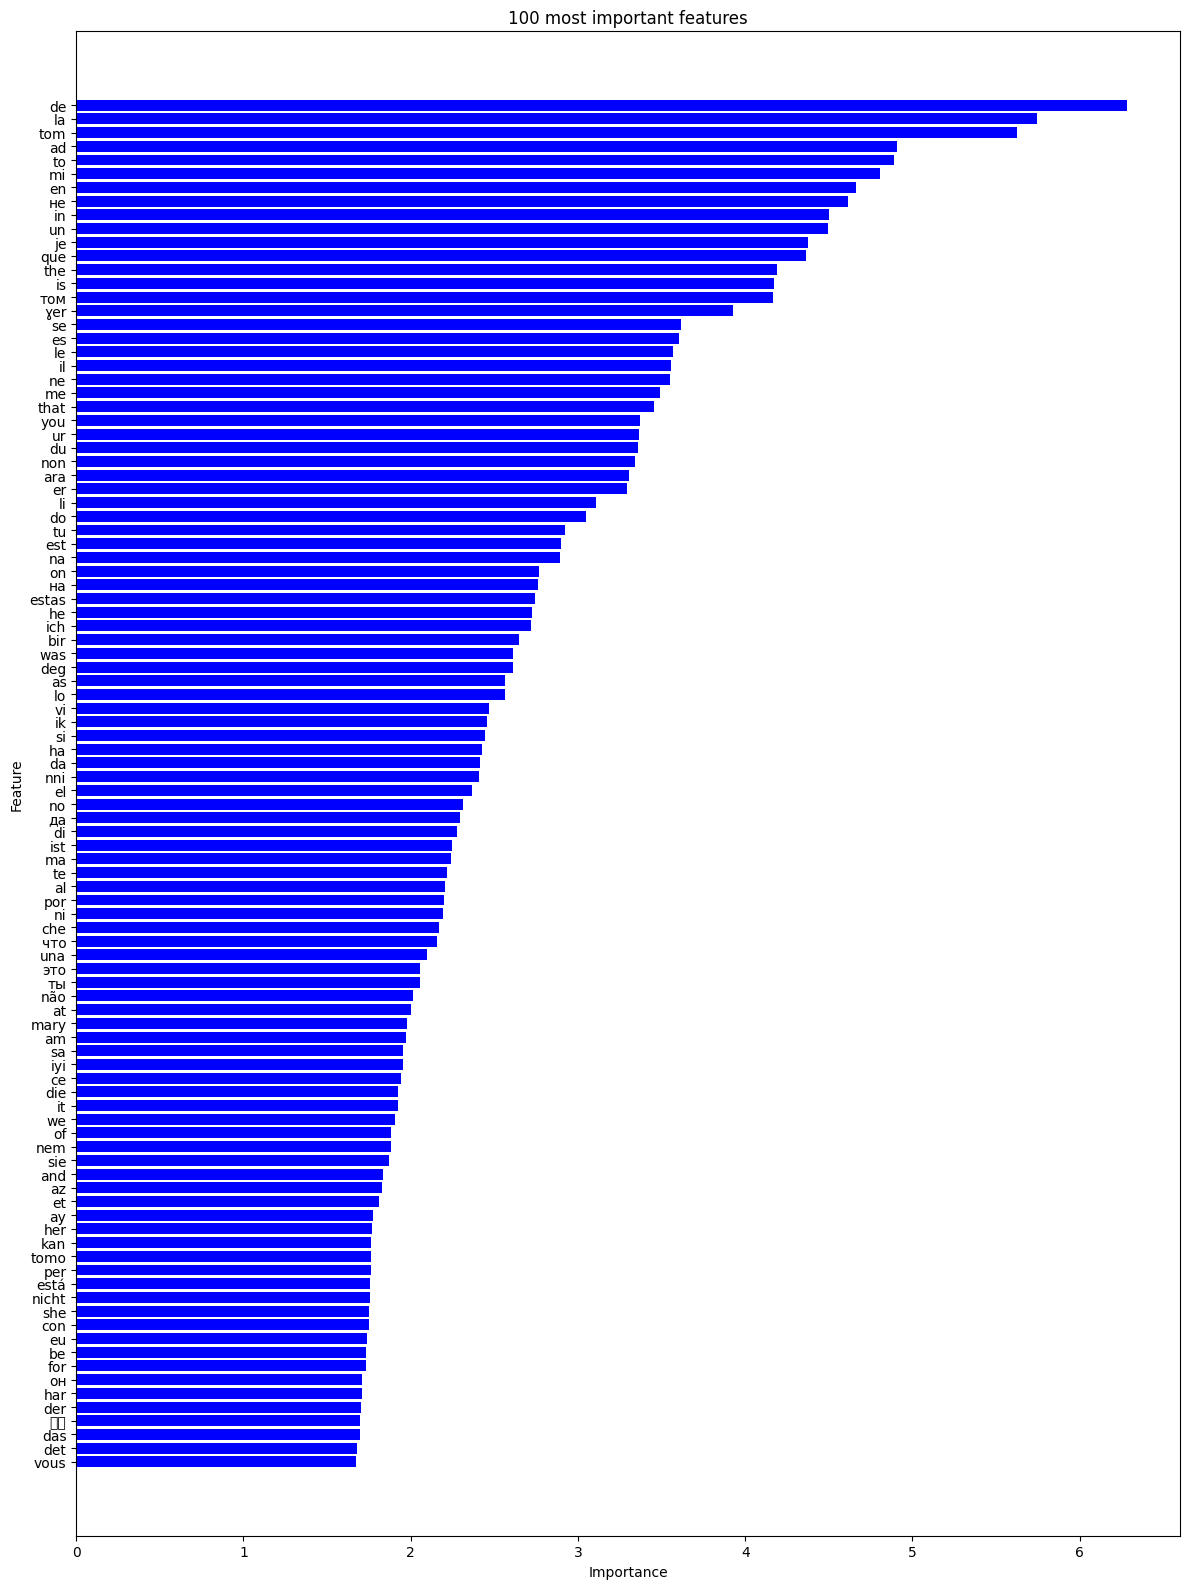

In [30]:
# features used by the model 
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_importances = np.abs(classifier.coef_).mean(axis=0)

# sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# plot the 100 most important features and their importance
top_n = 100
top_features = sorted_features[:top_n]
top_importances = sorted_importances[:top_n]
plt.figure(figsize=(12, 16))
plt.barh(range(top_n), top_importances[::-1], align='center', color='blue')
plt.yticks(range(top_n), top_features[::-1])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('100 most important features')
plt.tight_layout()
plt.show()

In [31]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

z = conf_matrix
x = list(classifier.classes_)  # columns labels 
y = list(classifier.classes_)  # rows labels

# heatmap
fig = ff.create_annotated_heatmap(
    z, x=x, y=y, colorscale='Blues', showscale=True,
    annotation_text=z.astype(str).tolist(), font_colors=['black']  
)

fig.update_layout(
    title_text='Confusion Matrix (All Classes)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickangle=45),
    autosize=True,
    height=1600,  
    width=1600    
)
fig.show()



## Language classification: using stopwords vs without stopword

In [32]:
# Load
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# filter only italian, english and spanish sentences
filtered_data = data[data['lan_code'].isin(['ita', 'eng', 'spa'])]

# Divide columms data
X = filtered_data['sentence']
y = filtered_data['lan_code']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

# split data sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Vectorizer ready


In [33]:
# Train a Logistic Regression model
classifier = LogisticRegression(max_iter=100, random_state=42)
classifier.fit(X_train, y_train)

# predict test set
y_pred = classifier.predict(X_test)

# evaluation of the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         eng       1.00      1.00      1.00    316643
         ita       0.99      1.00      0.99    161561
         spa       1.00      0.97      0.98     74110

    accuracy                           0.99    552314
   macro avg       0.99      0.99      0.99    552314
weighted avg       0.99      0.99      0.99    552314

Accuracy: 0.9946371086012666


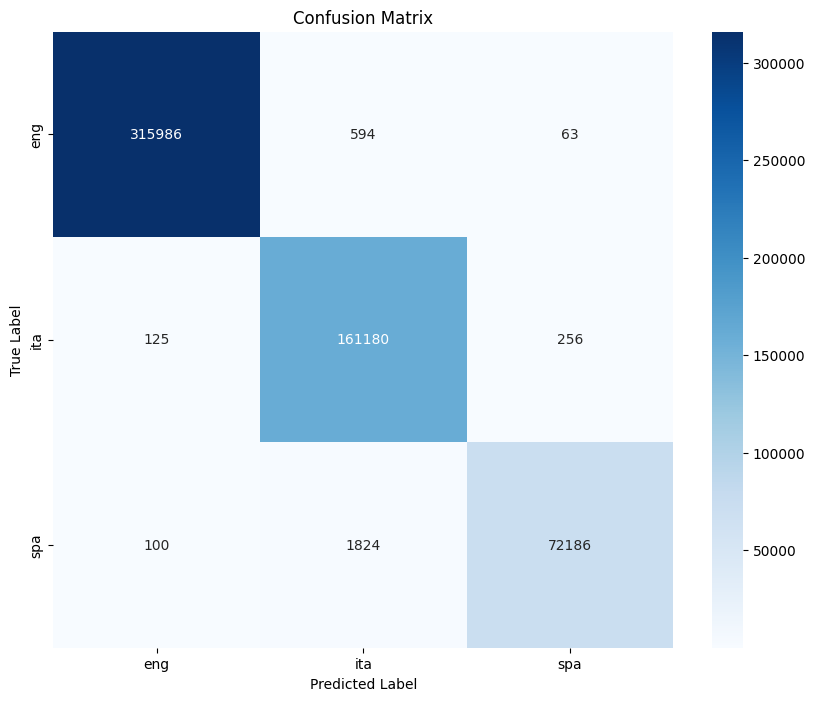

In [34]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

#  heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classifier.classes_, 
            yticklabels=classifier.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# load
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

def remove_stopwords(sentence, language):
    try:
        stop_words = set(stopwords.words(language))  
    except:
        stop_words = set()  
    tokens = sentence.lower().translate(str.maketrans('', '', string.punctuation)).split()
    return ' '.join([word for word in tokens if word not in stop_words])

language_mapping = {
    'eng': 'english',
    'ita': 'italian',
    'spa': 'spanish'
}

data['cleaned_sentence'] = data.apply(
    lambda row: remove_stopwords(row['sentence'], language_mapping.get(row['lan_code'], '')),
    axis=1
)

In [36]:
filtered_data = data[data['lan_code'].isin(['ita', 'eng', 'spa'])]

X = filtered_data['cleaned_sentence']
y = filtered_data['lan_code']

tfidf_vectorizer = TfidfVectorizer(max_features=1000, lowercase=True)  
X_tfidf = tfidf_vectorizer.fit_transform(X)

print("Vectorizer ready")

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Vectorizer ready


In [37]:
# Train a Logistic Regression model without stopwords
classifier = LogisticRegression(max_iter=100, random_state=42)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))

c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Classification Report:
              precision    recall  f1-score   support

         eng       0.99      0.91      0.95    316643
         ita       0.71      0.98      0.82    161561
         spa       0.96      0.49      0.65     74110

    accuracy                           0.87    552314
   macro avg       0.89      0.79      0.81    552314
weighted avg       0.90      0.87      0.87    552314

Accuracy: 0.8741657825077763


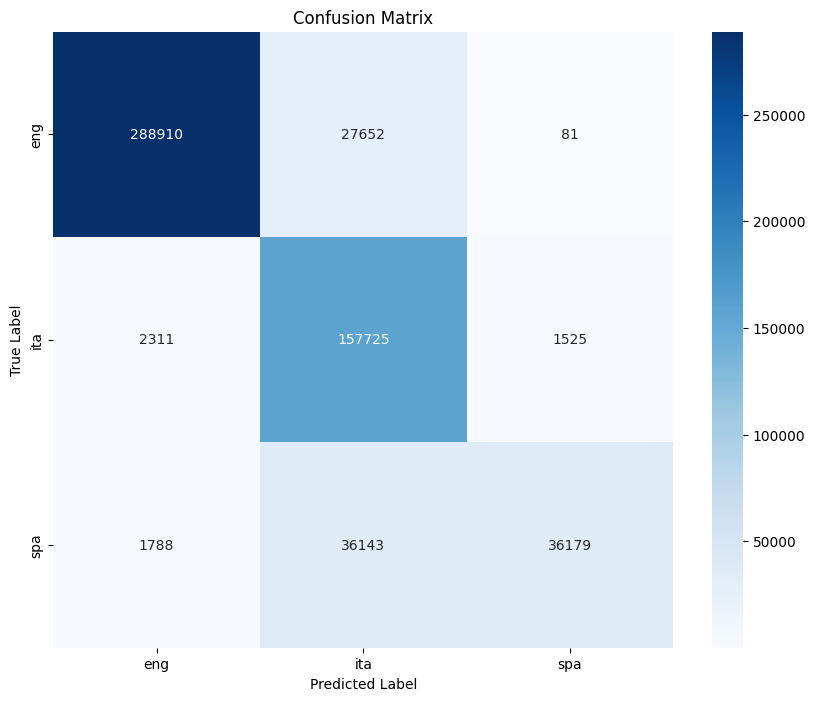

In [38]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classifier.classes_, 
            yticklabels=classifier.classes_)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Word2Vec

In [2]:
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text) # remove special characters
    text = re.sub(r'\d+', '', text) # remove numbers
    text = text.lower() # lower case 
    # Tokenize
    tokens = word_tokenize(text)
    return tokens

In [40]:
# load
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

# Apply preprocessing
data['tokens'] = data['sentence'].apply(preprocess_text)

In [41]:
corpus = data['tokens'].tolist()

# train Word2Vec model
model = Word2Vec(
    sentences=corpus,  # tokenized corpus
    vector_size=100,   # dimensionality of the embeddings
    window=5,          # Dimension of the context 
    min_count=15,       # Ignore words appearing less than 15 times
    workers=4          
)

# Save model
model.save("multilingual_word2vec.model")

print("Word2Vec Model saved")

Word2Vec Model saved


In [3]:
#load model
model = Word2Vec.load("multilingual_word2vec.model")

In [43]:
# find words correlated to cat in the model 
similar_words = model.wv.most_similar('cat', topn=10)
print("Words correlated to 'cat':", similar_words)

Words correlated to 'cat': [('dog', 0.9026539325714111), ('boy', 0.8839496374130249), ('horse', 0.8637125492095947), ('rabbit', 0.8523182272911072), ('squirrel', 0.849483072757721), ('bird', 0.8340262174606323), ('snake', 0.8270018696784973), ('puppy', 0.8264356851577759), ('flower', 0.8174018263816833), ('goat', 0.8106449842453003)]


In [44]:
# Try using analogy
analogy = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)
print("Results of the analogy: king - man + woman =", analogy)

Results of the analogy: king - man + woman = [('queen', 0.7940017580986023), ('princess', 0.7652568221092224), ('child', 0.7346464991569519)]


In [45]:
words = list(model.wv.index_to_key)[:1000]  # 1000 most common words
word_vectors = model.wv[words] # vectorize these words

# t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
reduced_vectors = tsne.fit_transform(word_vectors)

# visualize
tsne_df = pd.DataFrame(reduced_vectors, columns=['x', 'y'])
tsne_df['word'] = words
fig = px.scatter(tsne_df, x='x', y='y', text='word', title='t-SNE projection')
fig.update_traces(textposition='top center', marker=dict(size=8, opacity=0.8))
fig.update_layout(hovermode='closest', title_font_size=20)
fig.show()

c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



In [46]:
# Build a network of a subset of words
words_subset = ['cat', 'dog', 'gatto', 'cane', 'chat', 'chien']  
similarity_threshold = 0.5  

# build the graph
G = nx.Graph()
for word in words_subset:
    for similar_word, similarity in model.wv.most_similar(word, topn=10):
        if similarity > similarity_threshold:
            G.add_edge(word, similar_word, weight=similarity)

net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white")
net.from_nx(G)

for node in net.nodes:
    node['title'] = node['id']  

net.repulsion(
    node_distance=150,
    central_gravity=0.33,
    spring_length=100,
    spring_strength=0.10,
    damping=0.95,
)

# save as an html
net.write_html("semantic_network.html")
webbrowser.open("semantic_network.html")

True

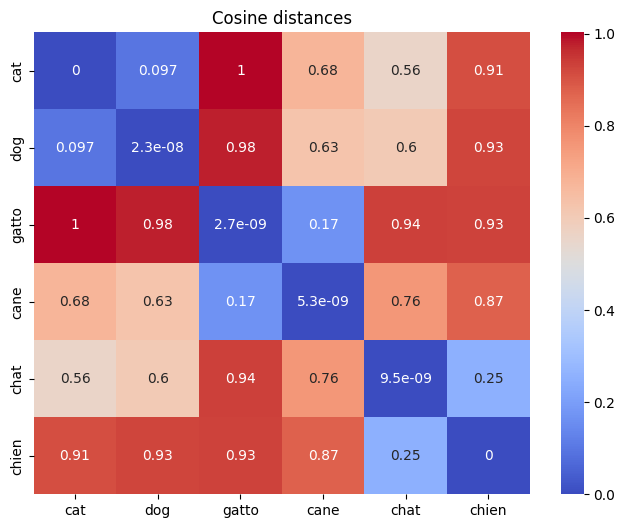

In [47]:
# Compute cosine distances of a subset of words
words = ['cat', 'dog', 'gatto', 'cane', 'chat', 'chien']
matrix = []

for word1 in words:
    row = []
    for word2 in words:
        dist = cosine(model.wv[word1], model.wv[word2])
        row.append(dist)
    matrix.append(row)

matrix = np.array(matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, xticklabels=words, yticklabels=words, annot=True, cmap='coolwarm', cbar=True)
plt.title("Cosine distances")
plt.show()

Analogy results: king - man + woman = [('queen', 0.7940017580986023)]


C:\Users\saver\AppData\Local\Temp\ipykernel_37764\2715805112.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




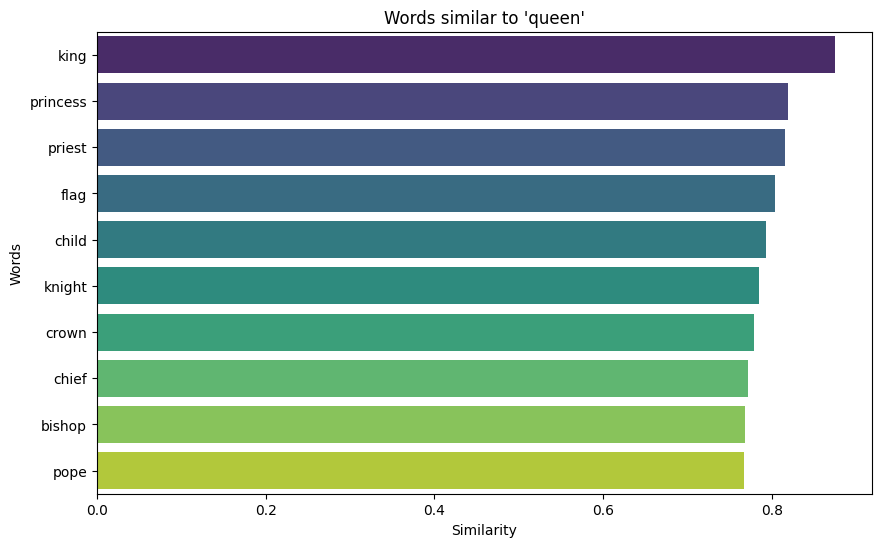

In [48]:
# Visualize Analogy results
analogy = model.wv.most_similar(positive=['king', 'woman'], negative=['man'], topn=1)
print("Analogy results: king - man + woman =", analogy)

word = analogy[0][0]
similar_words = model.wv.most_similar(word, topn=10)

similar_df = pd.DataFrame(similar_words, columns=['Word', 'Similarity'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Similarity', y='Word', data=similar_df, palette='viridis')
plt.title(f"Words similar to '{word}'")
plt.xlabel("Similarity")
plt.ylabel("Words")
plt.show()


# Document Clustering with Word2Vec

In [49]:
# vectorize a sentence using word2vec
def sentence_vector(sentence, model):
    tokens = preprocess_text(sentence)
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)  # mean of the vectors
    else:
        return np.zeros(model.vector_size)  # return null vector if empty

In [50]:
# load
file_path = 'data/balanced_language_dataset.csv'  
data = pd.read_csv(file_path, usecols=['lan_code', 'sentence'])

# divide column data
X = data['sentence']
y = data['lan_code']

X_mean = X.apply(lambda x: sentence_vector(x, model))

X_mean = np.array(X_mean.tolist())

In [51]:
# Clustering 
num_clusters = 18
kmeans = KMeans(n_clusters=num_clusters, init="k-means++",random_state=42)
clusters = kmeans.fit_predict(X_mean)

# Analysis
data['cluster'] = clusters
grouped = data.groupby(['lan_code', 'cluster']).size().reset_index(name='count')

cluster_totals = grouped.groupby('cluster')['count'].sum().reset_index()
cluster_totals.columns = ['cluster', 'total_count']

grouped = grouped.merge(cluster_totals, on='cluster')
grouped['fraction'] = grouped['count'] / grouped['total_count']

homogeneity = grouped.groupby('cluster')['fraction'].max().mean()

print(f"Homogeneity estimate: {homogeneity:.4f}")

grouped.to_csv("w2v_clustering_results.csv", index=False)

print("Result saved in 'w2v_clustering_results.csv'.")

Homogeneity estimate: 0.8501
Result saved in 'w2v_clustering_results.csv'.


In [52]:
data['cluster'] = clusters

grouped = data.groupby(['lan_code', 'cluster']).size().reset_index(name='count')

cluster_totals = grouped.groupby('cluster')['count'].sum().reset_index()
cluster_totals.columns = ['cluster', 'total_count']

grouped = grouped.merge(cluster_totals, on='cluster')
grouped['fraction'] = grouped['count'] / grouped['total_count']

dominant_languages = grouped.loc[grouped.groupby('cluster')['fraction'].idxmax()][['cluster', 'lan_code', 'fraction']]

dominant_languages = dominant_languages.sort_values(by='cluster')
print(dominant_languages)

dominant_languages.to_csv("w2v_balanced_dominant_languages_per_cluster.csv", index=False)
print("Results saved in 'w2v_balanced_dominant_languages_per_cluster.csv'.")

     cluster lan_code  fraction
78         0      heb  1.000000
196        1      tur  0.996263
26         2      eng  0.942213
178        3      rus  0.520262
37         4      epo  0.795916
85         5      hun  0.394151
17         6      deu  0.985483
167        7      por  0.980784
41         8      epo  0.986274
71         9      fra  0.985055
137       10      nld  0.995065
113       11      jpn  0.385288
106       12      ita  0.987914
59        13      fin  0.889904
194       14      spa  0.949365
95        15      hun  0.999346
62        16      fin  0.997908
13        17      ber  0.510781
Results saved in 'w2v_balanced_dominant_languages_per_cluster.csv'.


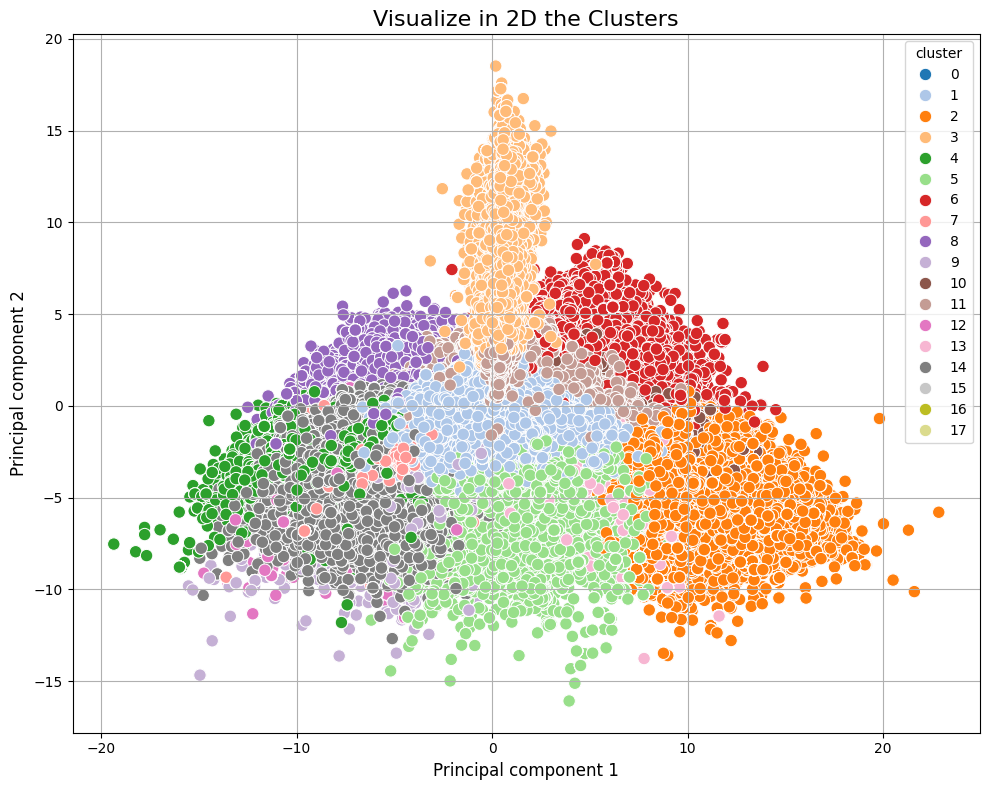

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2, random_state=42)

reduced_matrix_2d = pca.fit_transform(X_mean)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=reduced_matrix_2d[:, 0], y=reduced_matrix_2d[:, 1], hue=data['cluster'], palette="tab20", s=80, marker='o')

plt.title('Visualize in 2D the Clusters', fontsize=16)
plt.xlabel('Principal component 1', fontsize=12)
plt.ylabel('Principal component 2', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# Assign to each cluster its dominant langauge
cluster_to_language = {}
for cluster in data['cluster'].unique():
    most_common_language = data[data['cluster'] == cluster]['lan_code'].mode()[0]
    cluster_to_language[cluster] = most_common_language

print(cluster_to_language)

{17: 'ber', 11: 'jpn', 12: 'ita', 5: 'hun', 2: 'eng', 4: 'epo', 1: 'tur', 8: 'epo', 14: 'spa', 9: 'fra', 10: 'nld', 7: 'por', 6: 'deu', 15: 'hun', 16: 'fin', 13: 'fin', 0: 'heb', 3: 'rus'}


In [55]:
def predict_languages_for_phrases(phrases, model, kmeans):
    
    vectors = [sentence_vector(x, model) for x in phrases]

    predicted_clusters = kmeans.predict(vectors)

    predicted_languages = [cluster_to_language[cluster] for cluster in predicted_clusters]
    return predicted_languages

In [56]:
import csv
import random

accuracy = 0
n_rows = 0
sample_fraction = 0.2  

# load sentences and language codes
with open('data/balanced_language_dataset.csv', encoding='utf-8') as csvfile:
    reader = list(csv.DictReader(csvfile))  
    sampled_rows = random.sample(reader, int(len(reader) * sample_fraction))  

sentences = [row['sentence'] for row in sampled_rows]
real_lan_codes = [row['lan_code'] for row in sampled_rows]

predicted_languages = predict_languages_for_phrases(sentences, model, kmeans)

# Compute accuracy
for real, predicted in zip(real_lan_codes, predicted_languages):
    n_rows += 1
    if real == predicted:
        accuracy += 1

accuracy_percentage = (accuracy / n_rows) * 100 if n_rows > 0 else 0
print(f"Accuracy: {accuracy_percentage:.2f}%")

Accuracy: 77.89%


# LogReg with Word2Vec

In [4]:
# load
file_path = 'data/filtered_language_detection.csv'
data = pd.read_csv(file_path)

In [5]:
def sentence_vector(sentence, model):
    tokens = preprocess_text(sentence)
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)  
    else:
        return np.zeros(model.vector_size) 

In [6]:
# compute sentences vectors
data['vector'] = data['sentence'].apply(lambda x: sentence_vector(x, model))

In [7]:
#prepare dataset 
X = np.array(data['vector'].tolist())  # vectors matrix
y = data['lan_code']                  # languages code


In [8]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(X_train.shape)

(8033208, 100)


In [9]:
# train a Logistic Regression model
classifier = LogisticRegression(max_iter=100, random_state=42, multi_class='multinomial', solver='lbfgs')
classifier.fit(X_train, y_train)


c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\saver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [10]:
#evaluate the model
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9510143394768317
              precision    recall  f1-score   support

         ara       0.97      0.95      0.96      7730
         bel       0.94      0.67      0.79      2531
         ber       0.82      0.80      0.81    118244
         bul       0.83      0.66      0.73      4922
         ces       0.90      0.92      0.91     12776
         ckb       1.00      0.91      0.95      2130
         cmn       0.00      0.00      0.00     14488
         dan       0.83      0.93      0.88     10989
         deu       1.00      1.00      1.00    116935
         ell       1.00      0.98      0.99      6961
         eng       1.00      1.00      1.00    317324
         epo       0.99      1.00      0.99    137128
         fin       0.99      0.97      0.98     27818
         fra       0.99      0.99      0.99    100248
         heb       1.00      0.99      1.00     39841
         hin       0.89      0.81      0.85      2915
         hun       0.99      0.98      0.99     7156

In [11]:
def predict_language(sentence):
    vector = sentence_vector(sentence, model)
    predicted_language = classifier.predict([vector])
    return predicted_language[0]

# test predict language
test_sentence = "Bonjour tout le monde"
predicted_lang = predict_language(test_sentence)
print(f"Predicted language for the sentence: '{test_sentence}' is: {predicted_lang}")

Predicted language for the sentence: 'Bonjour tout le monde' is: fra


In [12]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=classifier.classes_)

z = conf_matrix
x = list(classifier.classes_)  
y = list(classifier.classes_)  

# visualize results
fig = ff.create_annotated_heatmap(
    z, x=x, y=y, colorscale='Blues', showscale=True,
    annotation_text=z.astype(str).tolist(), font_colors=['black']  
)

fig.update_layout(
    title_text='Confusion Matrix (All Classes)',
    xaxis_title='Predicted Label',
    yaxis_title='True Label',
    xaxis=dict(tickangle=45),
    autosize=True,
    height=1600,  
    width=1600    
)
fig.show()

In [13]:
#Features importance
coefficients = classifier.coef_

#compute the mean of all the coefficients in a class
importance = np.mean(np.abs(coefficients), axis=0)

# to visualize
feature_importance = pd.DataFrame({
    'Feature': range(0,X_train.shape[1]),  
    'Importance': importance
})

# sort features on their importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

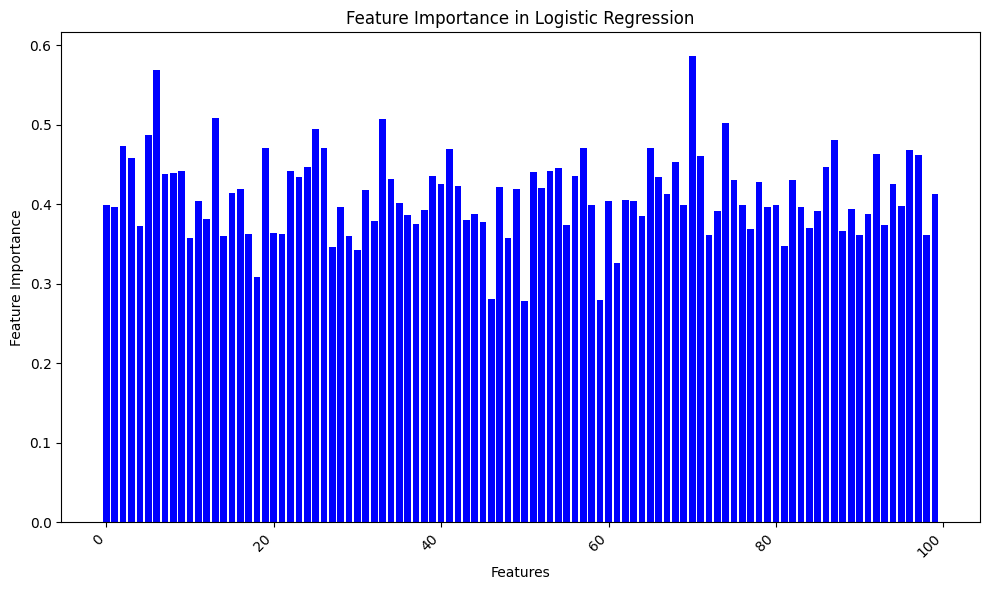

In [14]:
#plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xticks(rotation=45, ha='right')  
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.tight_layout()
plt.show()
